# Deep Convolutional GANs

By the end of this lesson, you will be able to:
- Build a convolutional generator based on the DCGAN model
- Build a convolutional discriminator also based on the DCGAN model
- Train these networks on a dataset of RGB images
- Implement two metrics for GANs performance evaluation

## DCGANs

To improve model performance, convolutional layers will be used to make a DCGAN.
- DCGANs have generator and discriminator networks, but the networks are made of convolutional layers that are designed to work with spatial data
- The discriminator will be a convolutional neural network (CNN) that classifies images are real or fake
- The generator will be a transpose CNN that upsamples a latent vector z and generates realistic images that can fool the discriminator

## DCGAN Discriminator
The DCGAN Discriminator is:
- A convolutional neural network (CNN) with one fully connected layer at the end
- There are **no max-pooling layers** in the network
- **Down-sampling** is accomplished using convolutional layers that have a stride equal to 2
- Batch normalization and Leaky ReLU activations are applied to the outputs of all hidden layers
- After a series of downsampling convolutional layers, the final layer is flattened and connected to a single sigmoid unit
- The sigmoid unit output has a range from 0 to 1, indicating if an image is "real" or "fake"

Definitions:
- **Leaky ReLu** – a function that will reduce any negative values by multiplying those values by some small coefficient, known as the negative slope.
- **Batch Normalization** – scales the layer outputs to have a mean of 0 and variance of 1, to help the network train faster and reduce problems due to poor parameter initialization.

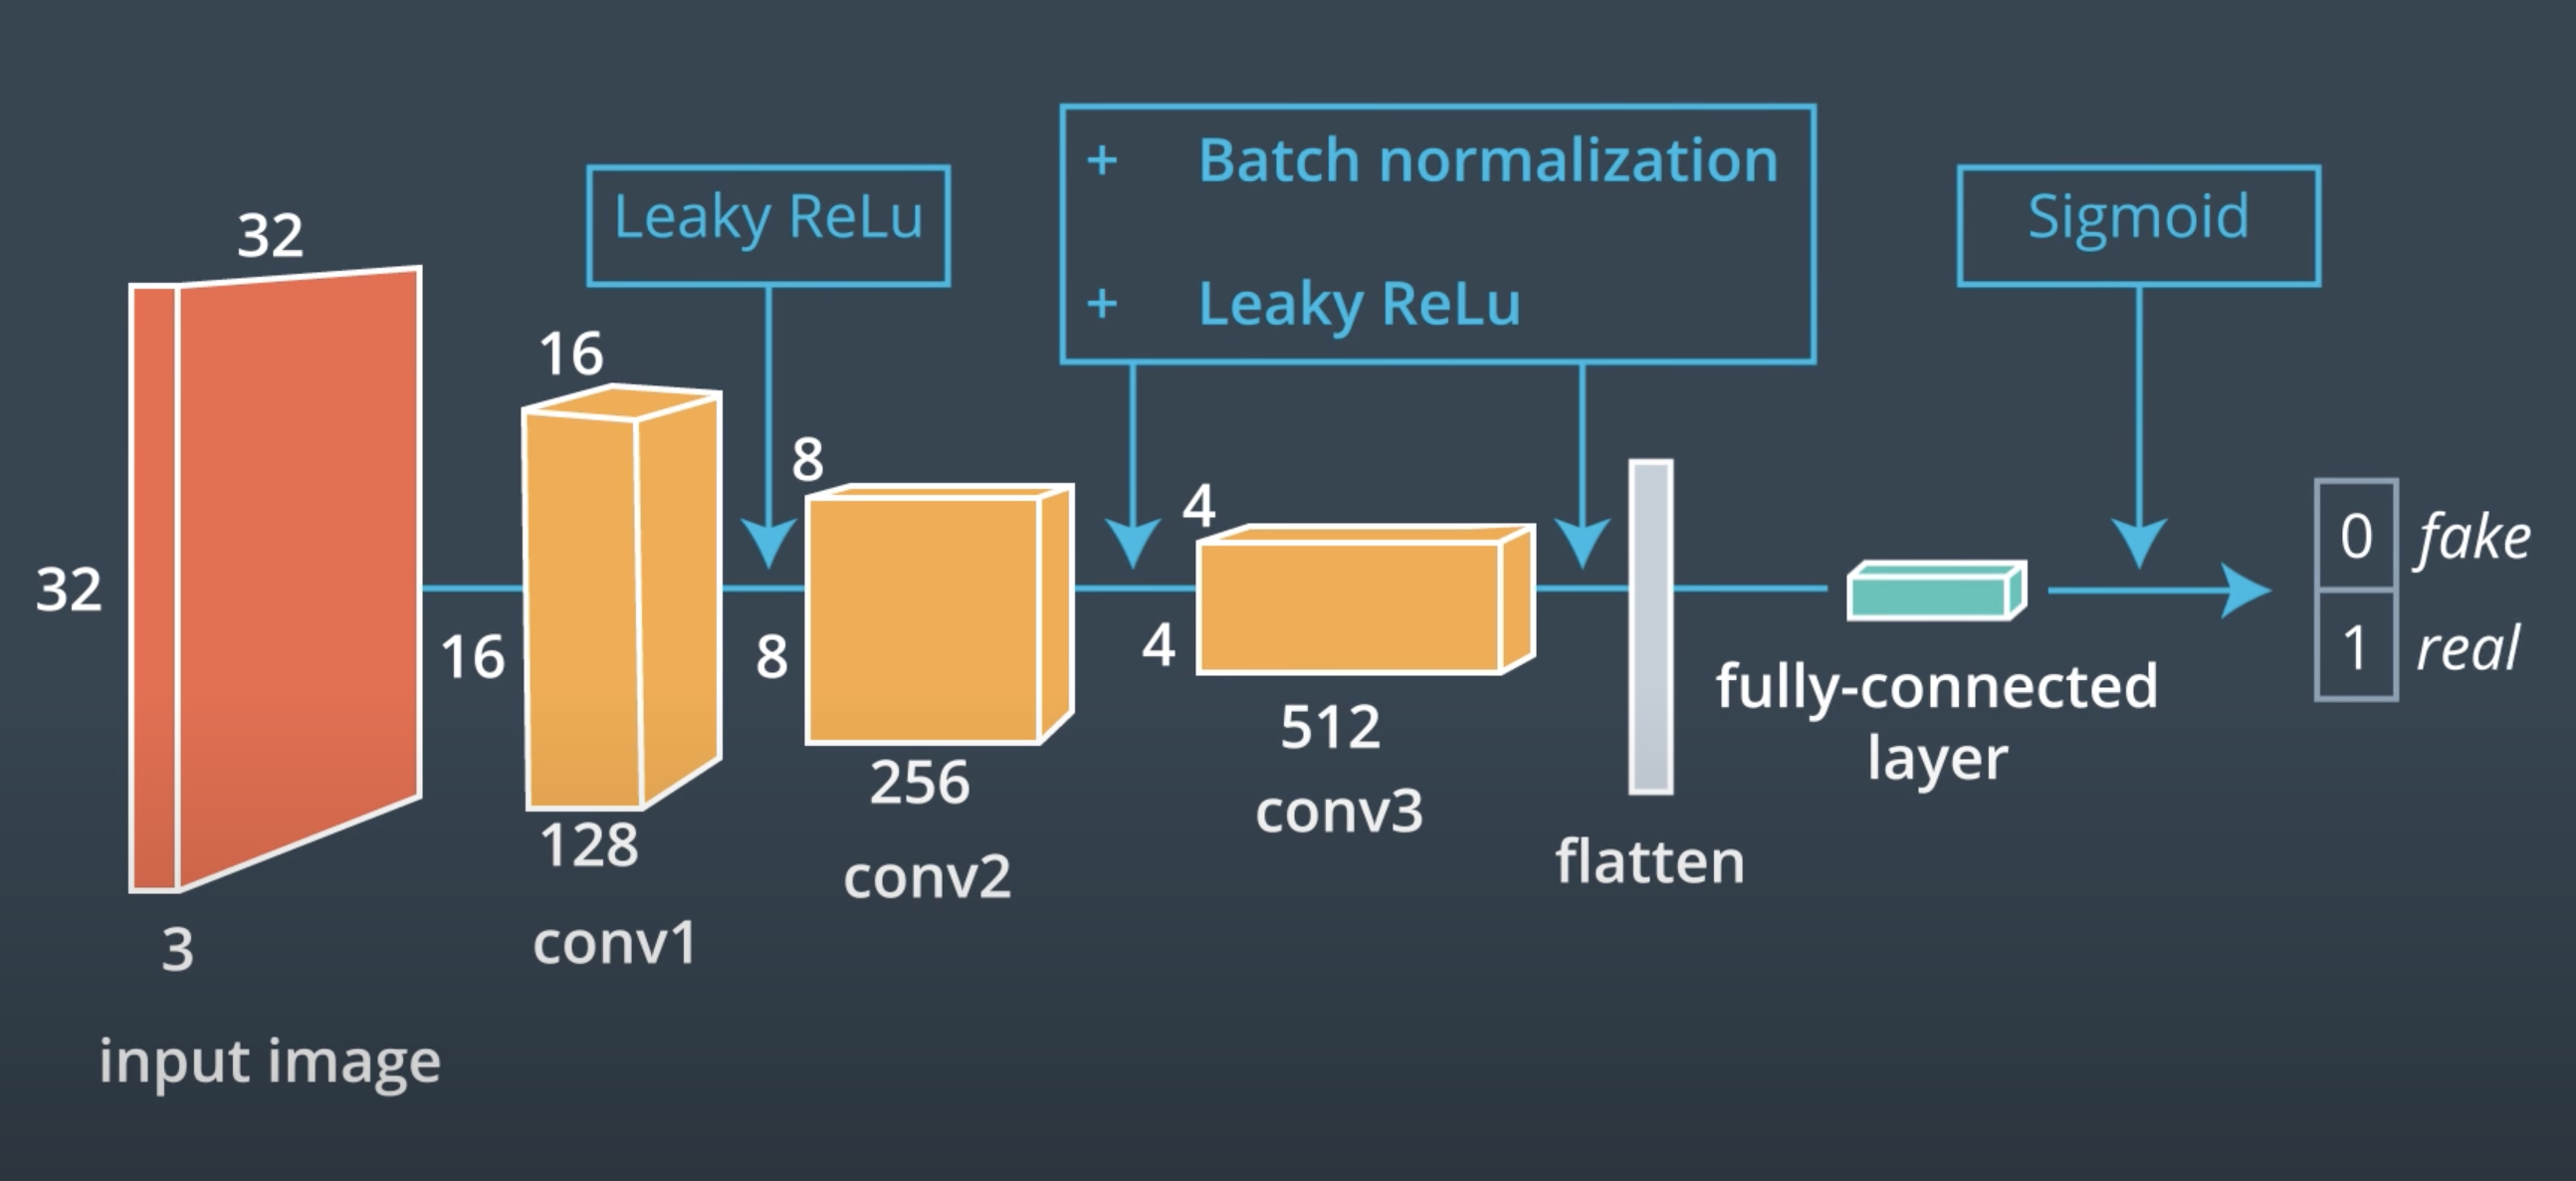

## DCGAN Generator
The task of a DCGAN Generator is to understand patterns in the underlying structure and features of the training data, in ways that allow it to create realistic generated images.

The DCGAN Generator:
- Has an input, random vector z
- Has an image output that can be sent to the discriminator
- Up-samples the vector z until it is the same shape as the training images
- Uses transposed convolutions
- ReLU activations and batch normalization is used on all hidden layers
- A tanh activation function is applied the the outputs of the final layer

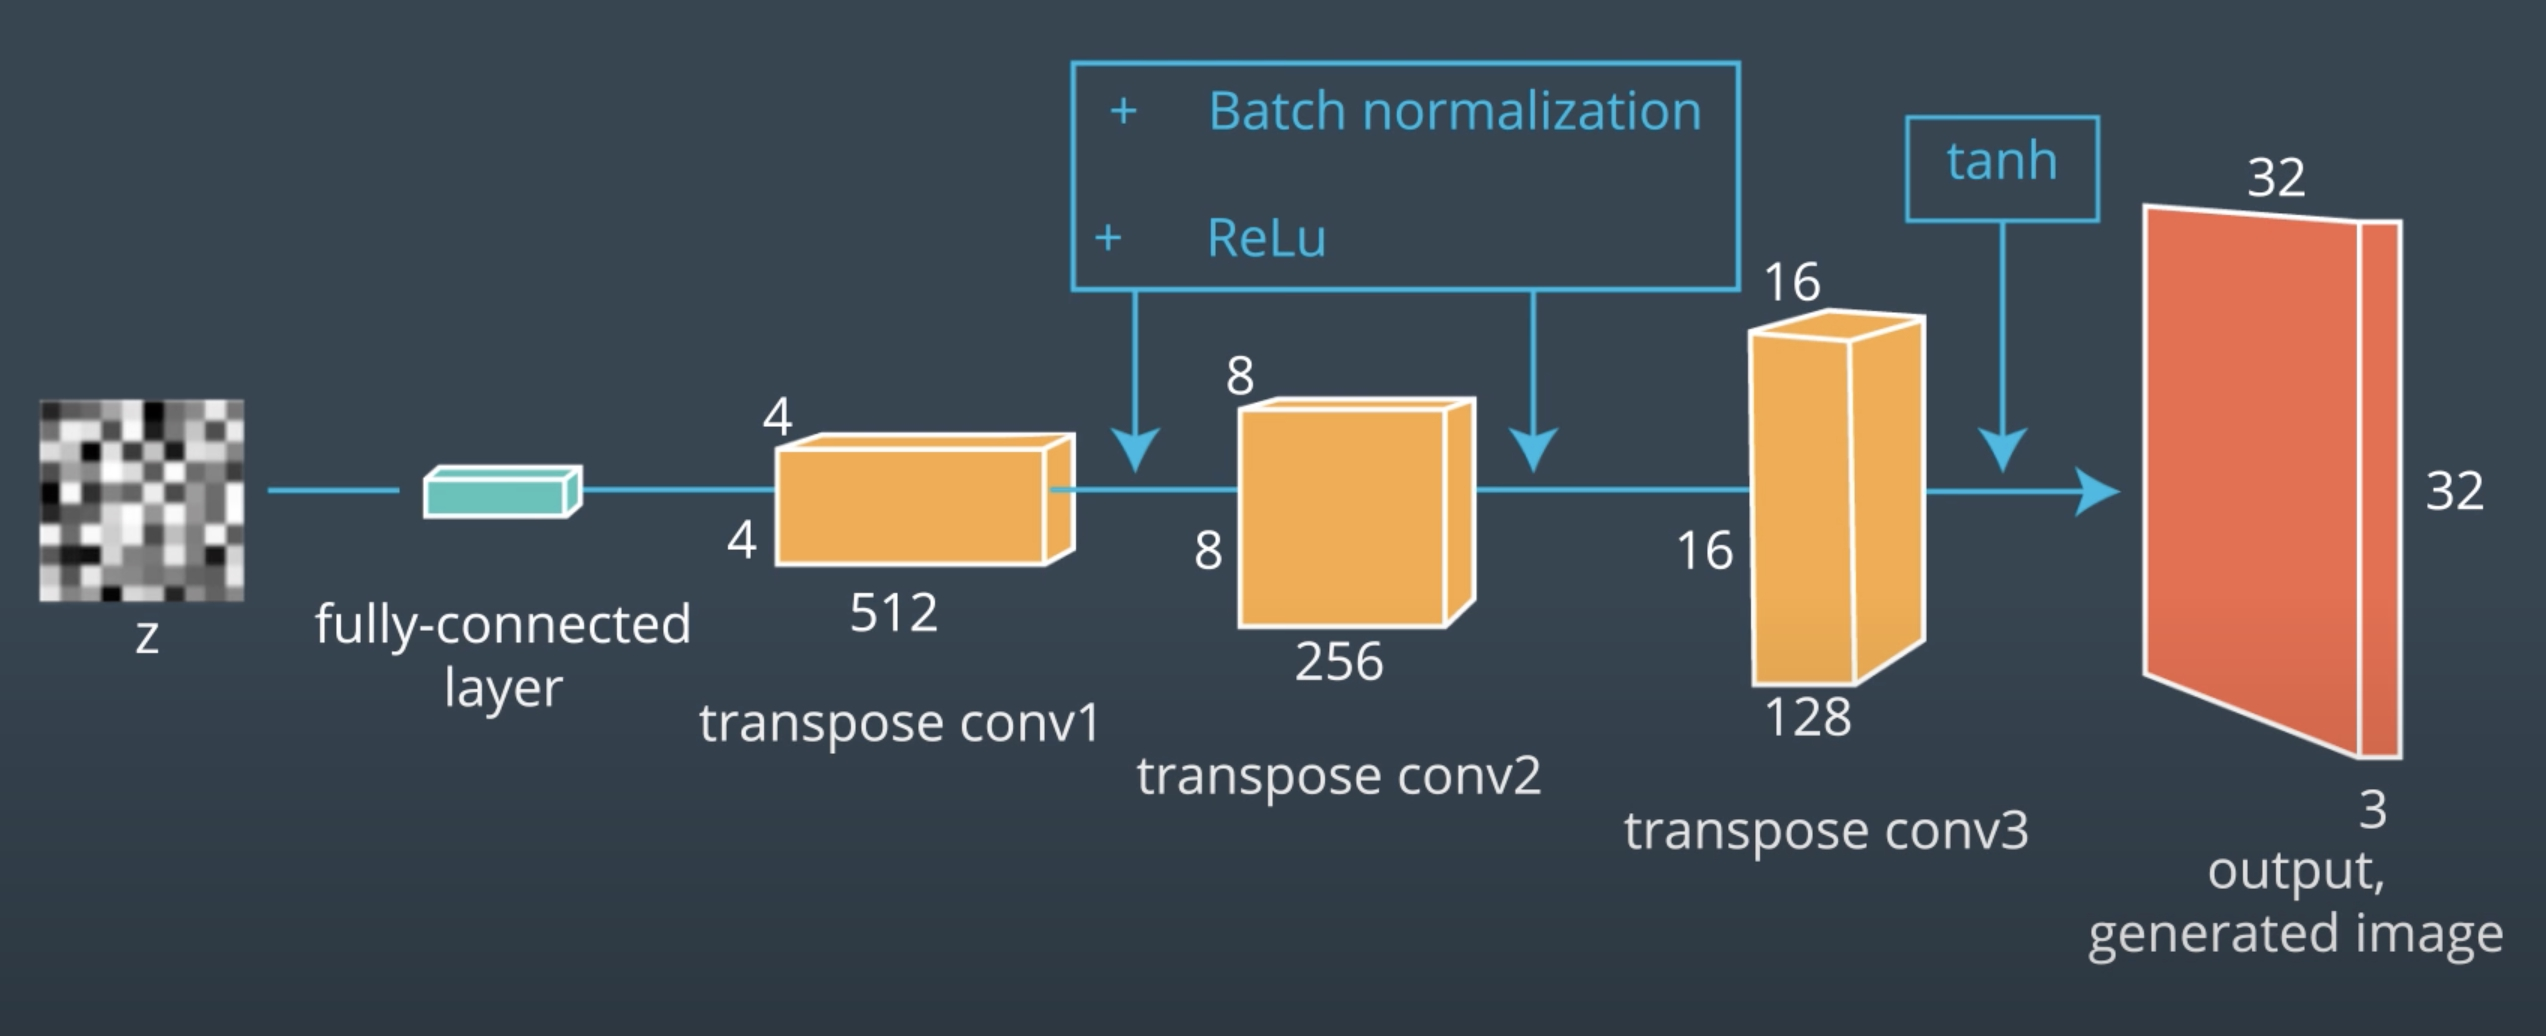

To generate an image, the generator:
1. Connects the input vector z to a fully connected layer
2. The fully connected layer is reshaped to a 4x4 XY shape of a given depth
3. A stack of larger layers is built by upsampling with transpose convolution
4. Each layer is doubled in XY size using strides of 2, and depth is reduced
5. The final output is a generated image the same size as the training images

## Batch Normalisation
Batch normalization was introduced in Sergey Ioffe's and Christian Szegedy's 2015 paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift. **The idea is that, instead of just normalizing the inputs to the network, we normalize the inputs to every layer within the network.**

It's called "batch" normalization because, during training, we normalize each layer's inputs by using the mean and standard deviation (or variance) of the values in the current batch. These are sometimes called the batch statistics.

>Specifically, batch normalization normalizes the output of a previous layer by subtracting the batch mean and dividing by the batch standard deviation.

Why might this help? Well, we know that normalizing the inputs to a network helps the network learn and converge to a solution. However, a network is a series of layers, where the output of one layer becomes the input to another. That means we can think of any layer in a neural network as the first layer of a smaller network.

### Internal Covariate Shift
Beyond the intuitive reasons, there are good mathematical reasons to motivate batch normalization. It helps combat what the authors call internal covariate shift.

> In this case, internal covariate shift refers to the change in the distribution of the inputs to different layers. It turns out that training a network is most efficient when the distribution of inputs to each layer is similar!

And batch normalization is one method of standardizing the distribution of layer inputs. This discussion is best handled in the paper(opens in a new tab) and in Deep Learning(opens in a new tab), a book you can read online written by Ian Goodfellow, Yoshua Bengio, and Aaron Courville. Specifically, check out the batch normalization section of Chapter 8: Optimization for Training Deep Models(opens in a new tab).

### Benefits of Batch Normalization
Batch normalization optimizes network training. It has been shown to have several benefits:
- **Networks train faster** – Each training iteration will actually be slower because of the extra calculations during the forward pass and the additional hyperparameters to train during back propagation. However, it should converge much more quickly, so training should be faster overall.
- **Allows higher learning rates** – Gradient descent usually requires small learning rates for the network to converge. And as networks get deeper, their gradients get smaller during back propagation so they require even more iterations. Using batch normalization allows us to use much higher learning rates, which further increases the speed at which networks train.
- **Makes weights easier to initialize** – Weight initialization can be difficult, and it's even more difficult when creating deeper networks. Batch normalization seems to allow us to be much less careful about choosing our initial starting weights.
- **Makes more activation functions viable** – Some activation functions do not work well in some situations. Sigmoids lose their gradient pretty quickly, which means they can't be used in deep networks. And ReLUs often die out during training, where they stop learning completely, so we need to be careful about the range of values fed into them. Because batch normalization regulates the values going into each activation function, non-linearlities that don't seem to work well in deep networks actually become viable again.
- **Simplifies the creation of deeper networks** – Because of the first 4 items listed above, it is easier to build and faster to train deeper neural networks when using batch normalization. And it's been shown that deeper networks generally produce better results, so that's great.
- **Provides a bit of regularization** – Batch normalization adds a little noise to your network. In some cases, such as in Inception modules, batch normalization has been shown to work as well as dropout. But in general, consider batch normalization as a bit of extra regularization, possibly allowing you to reduce some of the dropout you might add to a network.
- **May give better results overall** – Some tests seem to show batch normalization actually improves the training results. However, it's really an optimization to help train faster, so you shouldn't think of it as a way to make your network better. But since it lets you train networks faster, that means you can iterate over more designs more quickly. It also lets you build deeper networks, which are usually better. So when you factor in everything, you're probably going to end up with better results if you build your networks with batch normalization.

## Training GANs
Training GANs is hard.

Recipe to training guidelines: https://karpathy.github.io/2019/04/25/recipe/

## GAN Evaluation

### The Inception Model
The Inception Model is a concatenation of the outputs of layers of different filter sizes that allows deeper networks. The Inception Score and the Frechet Inception use the Inception Model for their calculations.

### Kullback Leibler (KL) Divergence
The KL divergence is a measure of distance between two probability distributions.
- Low KL divergence means that the distributions are similar
- High KL divergence means that they are different

### The Inception Score
The Inception Score leverages the KL divergence and the inception model to evaluate generated samples. To calculate the inception score, build two probability distributions.
- Conditional Distribution – feed a generated sample through the inception model pre-trained on the ImageNet dataset. The inception model will output a probability distribution with the last soft-max layer.
- Marginal Distribution – the mean of all the p(y|x) over all of the x values.
- Use KL Divergence to measure the distance between the two distributions

__Limitations__:
The inception score is a great tool to calculate a GAN performance but has some limitations:
- It relies on a model pre-trained on the ImageNet dataset.
- It does not take into account the real dataset, which can be limiting in some situations.

### Frechet Inception Distance
Frechet Inception Distance or FID measures the distance between two multinomial Gaussian distributions, where the mean and covariance are calculated from the real and the generated samples. 